In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import scipy as scp
import pandas as pd
import copy as cp
from tqdm import tqdm 

sns.set_theme(style="darkgrid",context='talk', font_scale=1.1)
%matplotlib inline

In [2]:
import numpy as np
from copy import deepcopy

class SAA(object):
    def __init__(self, init, prop, stoich):
        self.init_cond = deepcopy(init)
        self.prop = deepcopy(prop)
        self.stoichiometry = deepcopy(stoich)
        self.terminate=False
        self.rec_times = {k:[] for i, (k,v) in enumerate(self.stoichiometry.items())}
        
    @property
    def propensities(self):
        return [i(self.init_cond) for i in self.prop.values()]
    
    def execute_first_reaction(self):
        prop_list = self.propensities
        if len(np.nonzero(prop_list)) > 0:
            times = [(1/i)*np.log(1/np.random.uniform()) if i > 0 else np.inf for i in prop_list]
            next_reaction = np.argmin(times)
            #print(next_reaction)
            for i in self.init_cond.keys():
                if i != 'time':
                    self.rec_times[next_reaction].append(times[next_reaction])
                    self.init_cond[i].append(self.init_cond[i][-1] + self.stoichiometry[next_reaction][i])
                else:
                    self.init_cond[i].append(self.init_cond[i][-1] + times[next_reaction])
        else:
            self.terminate = True
                
    def simulate(self, step, verbose=False):
        for i in tqdm(range(step), disable= not verbose):
            self.execute_first_reaction()
            if self.terminate:
                break

In [164]:
# initial species counts and sojourn times
initital_conditions = {
    "R":[100],
    "E": [100],
    "J": [0],
    "A": [0],
    "dauer" : [0],
    "Dead" : [0],
    "time": [0.0]
}

a = 1000
# propensity functions
propensities = {
    0: lambda d: 0.1 * d["E"][-1],
    1: lambda d: 0.05 * d["J"][-1],
    2: lambda d: 0.0 * d["E"][-1],
    3: lambda d: 0.0 * d["J"][-1],
    4: lambda d: 0.0 * d["A"][-1]
}
#     8: lambda d: 0.1 * d["J"][-1] if d["bacteria"][-1] < 10 else 0.0,
# }


# change in species for each propensity
stoichiometry = {
    0: {"R":0, "E":-1, "J":+1, "A": 0, "dauer": 0, "Dead": 0},
    1: {"R":0, "E": 0, "J":-1, "A":+1, "dauer": 0, "Dead": 0},
    2: {"R":0, "E":-1, "J": 0, "A": 0, "dauer": 0, "Dead": +1},
    3: {"R":0, "E": 0, "J":-1, "A": 0, "dauer": 0, "Dead": +1},
    4: {"R":0, "E": 0, "J": 0, "A": -1, "dauer": 0, "Dead": +1}
}

In [103]:
meta_pop_conditions = {i:deepcopy(initital_conditions) for i in range(2)}
meta_pop_propensities = {i:deepcopy(propensities) for i in range(2)}
meta_pop_stoichiometry = {i:deepcopy(stoichiometry) for i in range(2)}

In [104]:
meta_pop_connectivity = {0: (1, 2)}

In [ ]:
for i, (k,v) in enumerate(meta_pop_connectivity.items()):
    

In [105]:
meta_pop_diff_pat = {}

In [106]:
for i in meta_pop_connectivity:
    curr_ind = len(meta_pop_stoichiometry[i[0]])
    meta_pop_stoichiometry[i[0]][curr_ind + 1] = {"E": 0, "J": 0, "A": 0, "dauer": -1, "Dead": 0}
    meta_pop_propensities[i[0]][curr_ind + 1] = lambda d: (meta_pop_conditions[i[1]]['R'][-1]- meta_pop_conditions[i[0]]['R'][-1])/(500 + (meta_pop_conditions[i[1]]['R'][-1]- meta_pop_conditions[i[0]]['R'][-1])) if meta_pop_conditions[i[1]]['R'][-1] >  meta_pop_conditions[i[0]]['R'][-1] else 0.0
    meta_pop_stoichiometry[i[1]][curr_ind + 1] = {"E": 0, "J": 0, "A": 0, "dauer": +1, "Dead": 0}
    meta_pop_propensities[i[1]][curr_ind + 1] = lambda d: 0
    meta_pop_diff_pat[i[0]] = {curr_ind + 1: i[1]}

In [96]:
meta_pop_stoichiometry

{0: {0: {'E': -1, 'J': 1, 'A': 0, 'dauer': 0, 'Dead': 0},
  1: {'E': 0, 'J': -1, 'A': 1, 'dauer': 0, 'Dead': 0},
  2: {'E': -1, 'J': 0, 'A': 0, 'dauer': 0, 'Dead': 1},
  3: {'E': 0, 'J': -1, 'A': 0, 'dauer': 0, 'Dead': 1},
  4: {'E': 0, 'J': 0, 'A': -1, 'dauer': 0, 'Dead': 1},
  6: {'E': 0, 'J': 0, 'A': 0, 'dauer': -1, 'Dead': 0}},
 1: {0: {'E': -1, 'J': 1, 'A': 0, 'dauer': 0, 'Dead': 0},
  1: {'E': 0, 'J': -1, 'A': 1, 'dauer': 0, 'Dead': 0},
  2: {'E': -1, 'J': 0, 'A': 0, 'dauer': 0, 'Dead': 1},
  3: {'E': 0, 'J': -1, 'A': 0, 'dauer': 0, 'Dead': 1},
  4: {'E': 0, 'J': 0, 'A': -1, 'dauer': 0, 'Dead': 1},
  6: {'E': 0, 'J': 0, 'A': 0, 'dauer': 1, 'Dead': 0}}}

In [99]:
[for meta_pop_propensities

{0: {0: <function __main__.<lambda>(d)>,
  1: <function __main__.<lambda>(d)>,
  2: <function __main__.<lambda>(d)>,
  3: <function __main__.<lambda>(d)>,
  4: <function __main__.<lambda>(d)>,
  6: <function __main__.<lambda>(d)>},
 1: {0: <function __main__.<lambda>(d)>,
  1: <function __main__.<lambda>(d)>,
  2: <function __main__.<lambda>(d)>,
  3: <function __main__.<lambda>(d)>,
  4: <function __main__.<lambda>(d)>,
  6: <function __main__.<lambda>(d)>}}

In [ ]:
 return [i(self.init_cond) for i in self.prop.values()]

In [115]:
np.array([[i(meta_pop_conditions[j]) for i in meta_pop_propensities[j].values()] for j in meta_pop_conditions.keys()]).shape

(2, 6)

In [172]:
prop_list = np.array([[i(meta_pop_conditions[j]) for i in meta_pop_propensities[j].values()] for j in meta_pop_conditions.keys()])

In [180]:
np.nonzero(prop_list)

(array([0, 1]), array([0, 0]))

In [156]:
times = np.array([[(1/i)*np.log(1/np.random.uniform()) if i > 0 else np.inf for i in j] for j in prop_list])

In [157]:
times

array([[0.39717778,        inf,        inf,        inf,        inf,
               inf],
       [0.06055715,        inf,        inf,        inf,        inf,
               inf]])

In [144]:
np.argmin(times)

0

In [158]:
np.unravel_index(times.argmin(), times.shape)

(1, 0)

In [168]:
class MetaPop(object):
    
    def __init__(self, init, prop, stoich, n_pop, conn_patt):
        self.meta_pop_conditions = {i:deepcopy(initital_conditions) for i in range(n_pop)}
        self.meta_pop_propensities = {i:deepcopy(propensities) for i in range(n_pop)}
        self.meta_pop_stoichiometry = {i:deepcopy(stoichiometry) for i in range(n_pop)}
        self.meta_pop_conn_patt = {}
        for i in conn_patt:
            curr_ind_i = len(self.meta_pop_stoichiometry[i[0]])
            # i -> j
            self.meta_pop_stoichiometry[i[0]][curr_ind_i + 1] = {"E": 0, "J": 0, "A": 0, "dauer": -1, "Dead": 0}
            self.meta_pop_propensities[i[0]][curr_ind_i + 1] = lambda d: (self.meta_pop_conditions[i[1]]['R'][-1]- self.meta_pop_conditions[i[0]]['R'][-1])/(500 + (self.meta_pop_conditions[i[1]]['R'][-1]- self.meta_pop_conditions[i[0]]['R'][-1])) \
                                                                        if self.meta_pop_conditions[i[1]]['R'][-1] >  self.meta_pop_conditions[i[0]]['R'][-1] else 0.0
            curr_ind_j = len(self.meta_pop_stoichiometry[i[1]])
            self.meta_pop_stoichiometry[i[1]][curr_ind_j + 1] = {"E": 0, "J": 0, "A": 0, "dauer": +1, "Dead": 0}
            self.meta_pop_propensities[i[1]][curr_ind_j + 1] = lambda d: 0
            self.meta_pop_conn_patt[i[0]] = {curr_ind_i + 1: (i[1], curr_ind_j)}
            
    @property
    def propensities(self):
        return np.array([[i(self.meta_pop_conditions[j]) for i in self.meta_pop_propensities[j].values()] for j in self.meta_pop_conditions.keys()])
    
    def execute_first_reaction(self):
        prop_list = self.propensities
        non_zeros = [i for i,j in enumerate(prop_list) if j > 0]
        if len(non_zeros) > 0:
            times = [(1/i)*np.log(1/np.random.uniform()) if i > 0 else np.inf for i in prop_list]
            next_reaction = np.argmin(times)
            #print(next_reaction)
            for i in self.init_cond.keys():
                if i != 'time':
                    self.rec_times[next_reaction].append(times[next_reaction])
                    self.init_cond[i].append(self.init_cond[i][-1] + self.stoichiometry[next_reaction][i])
                else:
                    self.init_cond[i].append(self.init_cond[i][-1] + times[next_reaction])
        else:
            self.terminate = True

In [169]:
test = MetaPop(initital_conditions, propensities, stoichiometry, 2, [(0,1),(1,0)])

In [170]:
test.meta_pop_stoichiometry

{0: {0: {'R': 0, 'E': -1, 'J': 1, 'A': 0, 'dauer': 0, 'Dead': 0},
  1: {'R': 0, 'E': 0, 'J': -1, 'A': 1, 'dauer': 0, 'Dead': 0},
  2: {'R': 0, 'E': -1, 'J': 0, 'A': 0, 'dauer': 0, 'Dead': 1},
  3: {'R': 0, 'E': 0, 'J': -1, 'A': 0, 'dauer': 0, 'Dead': 1},
  4: {'R': 0, 'E': 0, 'J': 0, 'A': -1, 'dauer': 0, 'Dead': 1},
  6: {'E': 0, 'J': 0, 'A': 0, 'dauer': -1, 'Dead': 0},
  7: {'E': 0, 'J': 0, 'A': 0, 'dauer': 1, 'Dead': 0}},
 1: {0: {'R': 0, 'E': -1, 'J': 1, 'A': 0, 'dauer': 0, 'Dead': 0},
  1: {'R': 0, 'E': 0, 'J': -1, 'A': 1, 'dauer': 0, 'Dead': 0},
  2: {'R': 0, 'E': -1, 'J': 0, 'A': 0, 'dauer': 0, 'Dead': 1},
  3: {'R': 0, 'E': 0, 'J': -1, 'A': 0, 'dauer': 0, 'Dead': 1},
  4: {'R': 0, 'E': 0, 'J': 0, 'A': -1, 'dauer': 0, 'Dead': 1},
  6: {'E': 0, 'J': 0, 'A': 0, 'dauer': 1, 'Dead': 0},
  7: {'E': 0, 'J': 0, 'A': 0, 'dauer': -1, 'Dead': 0}}}

In [171]:
test.meta_pop_conn_patt

{0: {6: (1, 5)}, 1: {7: (0, 6)}}

[Text(0.5, 0, '$\\Delta(R1, R2)$'), Text(0, 0.5, 'D')]

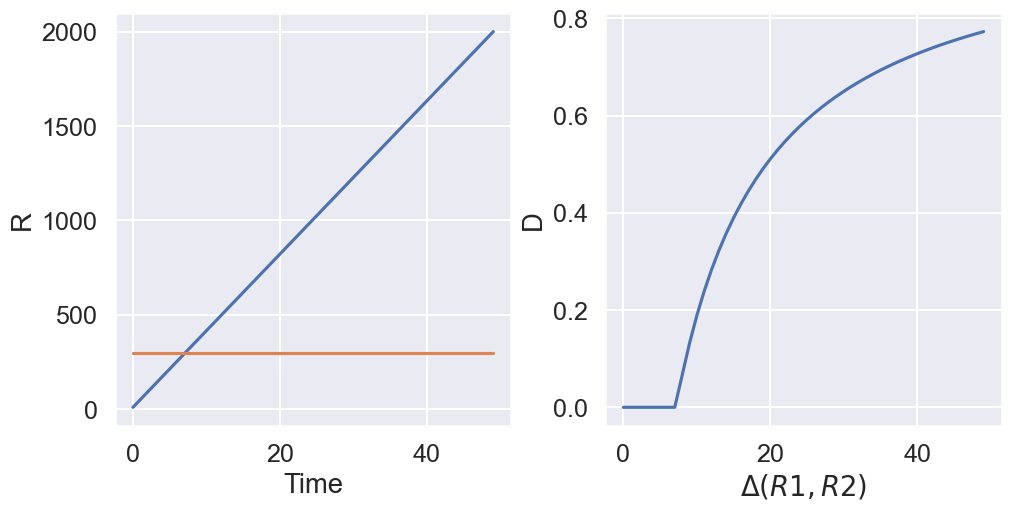

In [58]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(10, 5),constrained_layout=True)

axes = axes.flatten()

grad_1 = np.linspace(10, 2000)
grad_2 = [300 for i in range(len(grad_1))]
x = range(len(grad_1))
axes[0].plot(x, grad_1)
axes[0].plot(x, grad_2)

axes[1].plot(x, [func(i,j) for i,j in zip(grad_2, grad_1)])

axes[0].set(xlabel='Time', ylabel='R')

axes[1].set(xlabel=r'$\Delta(R1, R2)$', ylabel='D')

In [12]:
meta_pop_conditions = {i:deepcopy(initital_conditions) for i in range(2)}

In [22]:
neighbourhood = {0: (1, 2), 1: (0, 2)}

In [18]:
stoichiometry = {
    0: {"E":-1, "J":+1, "A": 0, "dauer": 0, "Dead": 0},
    1: {"E": 0, "J":-1, "A":+1, "dauer": 0, "Dead": 0},
    2: {"E":-1, "J": 0, "A": 0, "dauer": 0, "Dead": +1},
    3: {"E": 0, "J":-1, "A": 0, "dauer": 0, "Dead": +1},
    4: {"E": 0, "J": 0, "A": -1, "dauer": 0, "Dead": +1}
}

In [23]:
emig = {"E": 0, "J": 0, "A": 0, "dauer": -1, "Dead": +1}
mig  = {"E": 0, "J": 0, "A": 0, "dauer": +1, "Dead": +1}

In [26]:
for i in neighbourhood[0]:
    curr_ind = len(stoichiometry)
    stoichiometry[curr_ind + 1] = mig

In [27]:
stoichiometry

{0: {'E': -1, 'J': 1, 'A': 0, 'dauer': 0, 'Dead': 0},
 1: {'E': 0, 'J': -1, 'A': 1, 'dauer': 0, 'Dead': 0},
 2: {'E': -1, 'J': 0, 'A': 0, 'dauer': 0, 'Dead': 1},
 3: {'E': 0, 'J': -1, 'A': 0, 'dauer': 0, 'Dead': 1},
 4: {'E': 0, 'J': 0, 'A': -1, 'dauer': 0, 'Dead': 1},
 6: {'E': 0, 'J': 0, 'A': 0, 'dauer': 1, 'Dead': 1},
 7: {'E': 0, 'J': 0, 'A': 0, 'dauer': 1, 'Dead': 1}}